## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  13.482108   447.669333  0.922892  3.365417  413.651499
1  97.515701   276.380873  0.085621  7.021272  100.349957
2  74.150037   389.989451  0.194547  5.546026  106.127892
3  67.545713   718.057874  0.606550  4.759912  440.879972
4  95.649978  1465.156525  0.178860  5.679181  279.065138


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9751242	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9651073	total: 58ms	remaining: 29s
2:	learn: 0.9558868	total: 58.5ms	remaining: 19.5s
3:	learn: 0.9451800	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9324342	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9223524	total: 60.2ms	remaining: 9.97s
6:	learn: 0.9103272	total: 60.9ms	remaining: 8.63s
7:	learn: 0.8976527	total: 61.8ms	remaining: 7.67s
8:	learn: 0.8854534	total: 62.5ms	remaining: 6.88s
9:	learn: 0.8736944	total: 63.3ms	remaining: 6.26s
10:	learn: 0.8616892	total: 64ms	remaining: 5.75s
11:	learn: 0.8474406	total: 65ms	remaining: 5.35s
12:	learn: 0.8364032	total: 66ms	remaining: 5.01s
13:	learn: 0.8248153	total: 68.4ms	remaining: 4.82s
14:	learn: 0.8149820	total: 69.2ms	remaining: 4.55s
15:	learn: 0.8048819	total: 70.3ms	remaining: 4.32s
16:	learn: 0.7947858	total: 71.2ms	remaining: 4.12s
17:	learn: 0.7852185	total: 72.7ms	remaining: 3.97s
18:	learn: 0.7768876	total: 73.5ms	remaining: 3.79s
19

93:	learn: 0.3201485	total: 107ms	remaining: 1.03s
94:	learn: 0.3164564	total: 108ms	remaining: 1.03s
95:	learn: 0.3128720	total: 108ms	remaining: 1.02s
96:	learn: 0.3103314	total: 109ms	remaining: 1.01s
97:	learn: 0.3071657	total: 109ms	remaining: 1s
98:	learn: 0.3041776	total: 109ms	remaining: 996ms
99:	learn: 0.3004086	total: 113ms	remaining: 1.01s
100:	learn: 0.2962129	total: 113ms	remaining: 1.01s
101:	learn: 0.2931737	total: 114ms	remaining: 1s
102:	learn: 0.2901152	total: 114ms	remaining: 992ms
103:	learn: 0.2868272	total: 114ms	remaining: 985ms
104:	learn: 0.2844179	total: 115ms	remaining: 979ms
105:	learn: 0.2809041	total: 115ms	remaining: 973ms
106:	learn: 0.2783818	total: 116ms	remaining: 967ms
107:	learn: 0.2755046	total: 116ms	remaining: 961ms
108:	learn: 0.2721678	total: 117ms	remaining: 955ms
109:	learn: 0.2692029	total: 117ms	remaining: 948ms
110:	learn: 0.2665800	total: 118ms	remaining: 942ms
111:	learn: 0.2635520	total: 118ms	remaining: 935ms
112:	learn: 0.2607111	tot

269:	learn: 0.0672311	total: 185ms	remaining: 500ms
270:	learn: 0.0670052	total: 192ms	remaining: 517ms
271:	learn: 0.0667786	total: 193ms	remaining: 515ms
272:	learn: 0.0663332	total: 193ms	remaining: 514ms
273:	learn: 0.0661284	total: 193ms	remaining: 513ms
274:	learn: 0.0659206	total: 194ms	remaining: 511ms
275:	learn: 0.0654413	total: 194ms	remaining: 510ms
276:	learn: 0.0649915	total: 195ms	remaining: 508ms
277:	learn: 0.0647931	total: 195ms	remaining: 507ms
278:	learn: 0.0643446	total: 196ms	remaining: 505ms
279:	learn: 0.0639043	total: 196ms	remaining: 504ms
280:	learn: 0.0634509	total: 196ms	remaining: 503ms
281:	learn: 0.0632424	total: 197ms	remaining: 502ms
282:	learn: 0.0627019	total: 197ms	remaining: 500ms
283:	learn: 0.0624440	total: 198ms	remaining: 499ms
284:	learn: 0.0622447	total: 198ms	remaining: 497ms
285:	learn: 0.0620426	total: 199ms	remaining: 496ms
286:	learn: 0.0617138	total: 199ms	remaining: 495ms
287:	learn: 0.0615166	total: 200ms	remaining: 493ms
288:	learn: 

496:	learn: 0.0254956	total: 289ms	remaining: 293ms
497:	learn: 0.0253569	total: 290ms	remaining: 292ms
498:	learn: 0.0253284	total: 290ms	remaining: 292ms
499:	learn: 0.0253002	total: 291ms	remaining: 291ms
500:	learn: 0.0252724	total: 292ms	remaining: 290ms
501:	learn: 0.0251132	total: 292ms	remaining: 290ms
502:	learn: 0.0250741	total: 292ms	remaining: 289ms
503:	learn: 0.0250469	total: 293ms	remaining: 288ms
504:	learn: 0.0250199	total: 293ms	remaining: 287ms
505:	learn: 0.0248931	total: 294ms	remaining: 287ms
506:	learn: 0.0248665	total: 294ms	remaining: 286ms
507:	learn: 0.0248403	total: 295ms	remaining: 285ms
508:	learn: 0.0248144	total: 295ms	remaining: 284ms
509:	learn: 0.0246891	total: 295ms	remaining: 284ms
510:	learn: 0.0246518	total: 296ms	remaining: 283ms
511:	learn: 0.0246265	total: 296ms	remaining: 282ms
512:	learn: 0.0246015	total: 297ms	remaining: 282ms
513:	learn: 0.0244785	total: 297ms	remaining: 281ms
514:	learn: 0.0244538	total: 297ms	remaining: 280ms
515:	learn: 

671:	learn: 0.0134714	total: 367ms	remaining: 179ms
672:	learn: 0.0134219	total: 371ms	remaining: 180ms
673:	learn: 0.0133680	total: 372ms	remaining: 180ms
674:	learn: 0.0133187	total: 372ms	remaining: 179ms
675:	learn: 0.0132671	total: 373ms	remaining: 179ms
676:	learn: 0.0132167	total: 373ms	remaining: 178ms
677:	learn: 0.0131623	total: 373ms	remaining: 177ms
678:	learn: 0.0131053	total: 374ms	remaining: 177ms
679:	learn: 0.0130564	total: 374ms	remaining: 176ms
680:	learn: 0.0130085	total: 375ms	remaining: 176ms
681:	learn: 0.0129587	total: 375ms	remaining: 175ms
682:	learn: 0.0129121	total: 376ms	remaining: 174ms
683:	learn: 0.0128614	total: 376ms	remaining: 174ms
684:	learn: 0.0128110	total: 376ms	remaining: 173ms
685:	learn: 0.0127572	total: 377ms	remaining: 172ms
686:	learn: 0.0127121	total: 377ms	remaining: 172ms
687:	learn: 0.0126653	total: 378ms	remaining: 171ms
688:	learn: 0.0126214	total: 378ms	remaining: 171ms
689:	learn: 0.0125742	total: 378ms	remaining: 170ms
690:	learn: 

896:	learn: 0.0072595	total: 472ms	remaining: 54.2ms
897:	learn: 0.0072303	total: 473ms	remaining: 53.7ms
898:	learn: 0.0072259	total: 473ms	remaining: 53.2ms
899:	learn: 0.0072215	total: 474ms	remaining: 52.6ms
900:	learn: 0.0071983	total: 474ms	remaining: 52.1ms
901:	learn: 0.0071885	total: 474ms	remaining: 51.5ms
902:	learn: 0.0071809	total: 475ms	remaining: 51ms
903:	learn: 0.0071631	total: 475ms	remaining: 50.4ms
904:	learn: 0.0071445	total: 475ms	remaining: 49.9ms
905:	learn: 0.0071270	total: 476ms	remaining: 49.3ms
906:	learn: 0.0071228	total: 476ms	remaining: 48.8ms
907:	learn: 0.0071055	total: 476ms	remaining: 48.3ms
908:	learn: 0.0070837	total: 477ms	remaining: 47.7ms
909:	learn: 0.0070654	total: 477ms	remaining: 47.2ms
910:	learn: 0.0070485	total: 477ms	remaining: 46.6ms
911:	learn: 0.0070443	total: 477ms	remaining: 46.1ms
912:	learn: 0.0070230	total: 478ms	remaining: 45.5ms
913:	learn: 0.0070188	total: 479ms	remaining: 45.1ms
914:	learn: 0.0069990	total: 481ms	remaining: 44

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

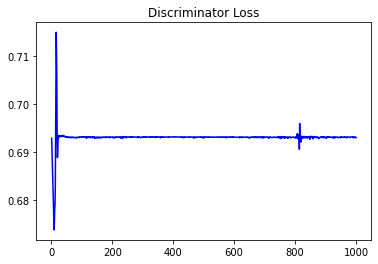

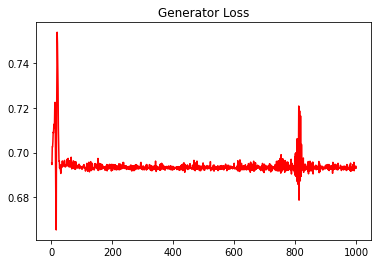

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.016157735398806668


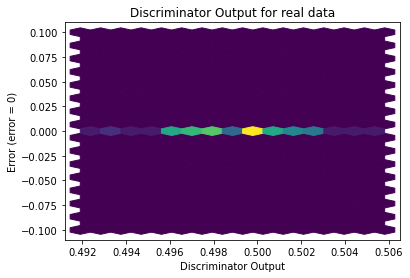

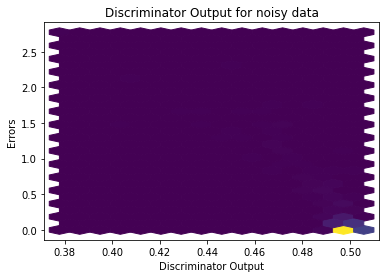

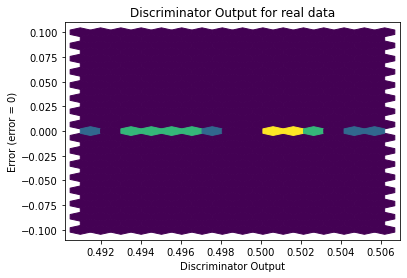

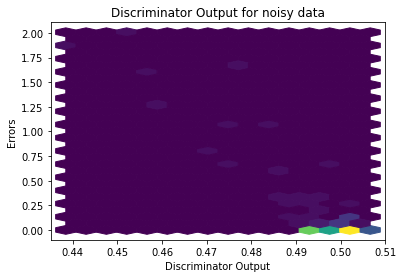

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


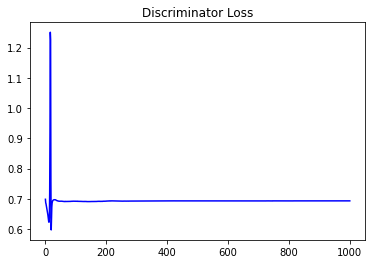

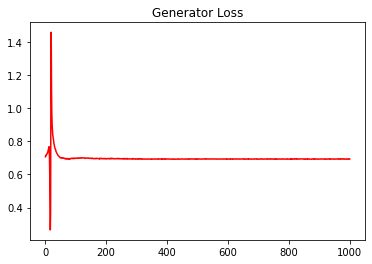

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.023027480877530624


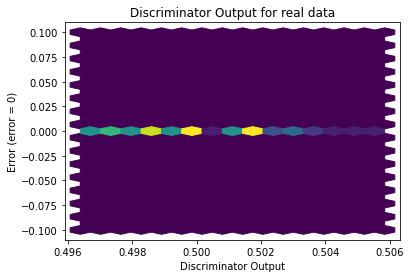

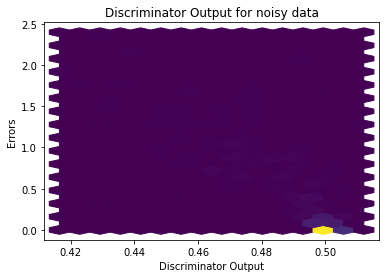

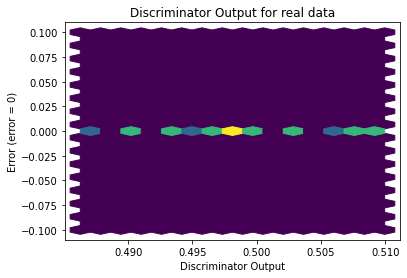

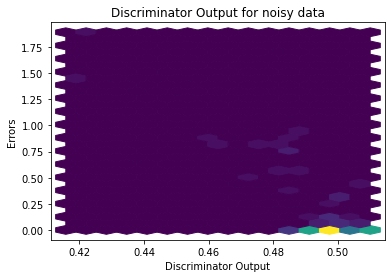

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0752]], requires_grad=True)
